In [11]:
# at the moment, best way to extract some features and evaluate them
# is using AlignedFeatureData class
from pystoms.aligned_feature_data import AlignedFeatureData
# import a model
from pystoms.models_3d.model_3d_m1 import ModelM1
# Data handling is done by proteolizarddata (https://github.com/theGreatHerrLebert/proteolizard-data)
from proteolizarddata.data import PyTimsDataHandleDDA
# for generating random feature ids
import numpy as np
random_seed = 2022
rng = np.random.default_rng(random_seed)

In [12]:
# get data
data_path = "/home/tim/Workspaces/MassSpecDaten/M210115_001_Slot1-1_1_850.d/"
data_handle = PyTimsDataHandleDDA(data_path)

In [13]:
total_features = 1
feature_ids = np.random.randint(1000,4001,size=total_features)

In [14]:
aligned_features = AlignedFeatureData(
                            data_handle,
                            ids=feature_ids,
                            is_parallel=False)

In [15]:
# create model
model = ModelM1(aligned_features,random_number_generator=rng)


In [16]:
# no the model can be sampled
sample_trace = model.evaluation()

ERROR:pymc:There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc:There were 155 divergences after tuning. Increase `target_accept` or reparameterize.


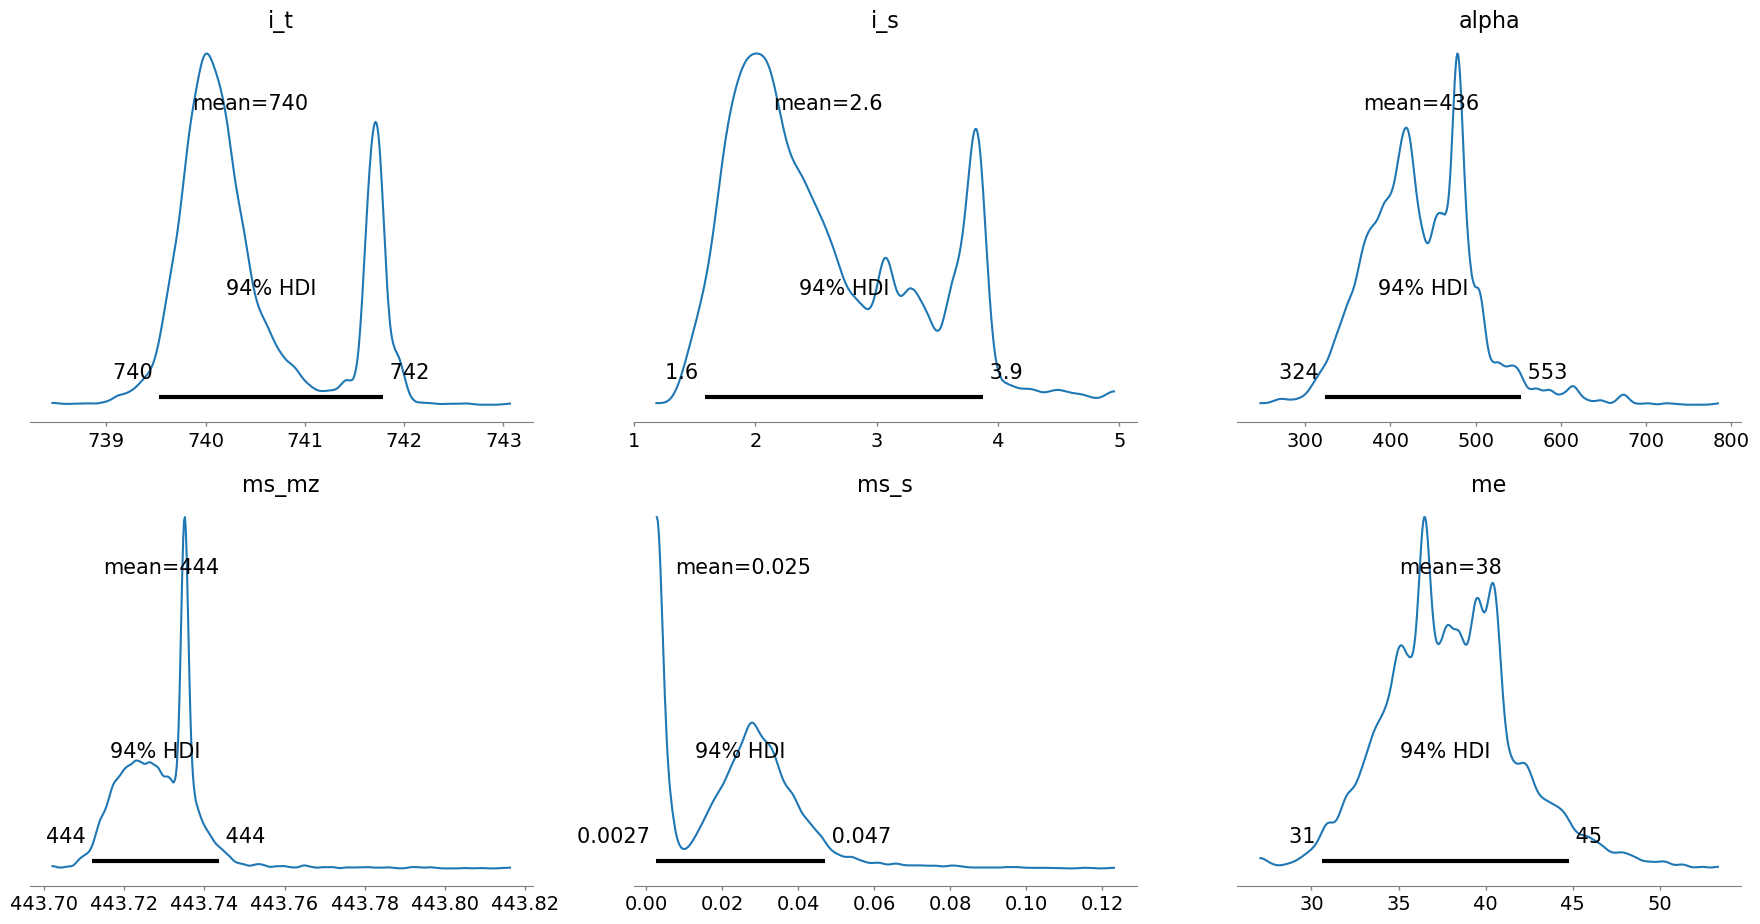

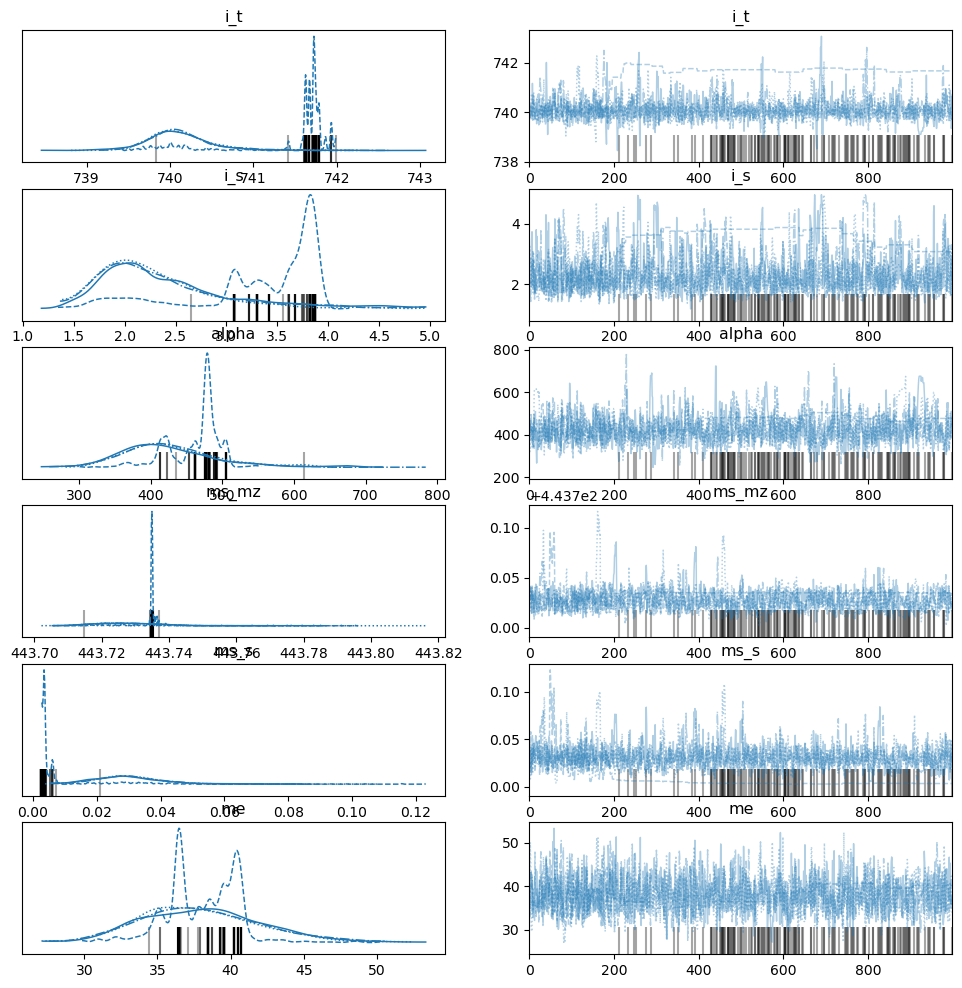

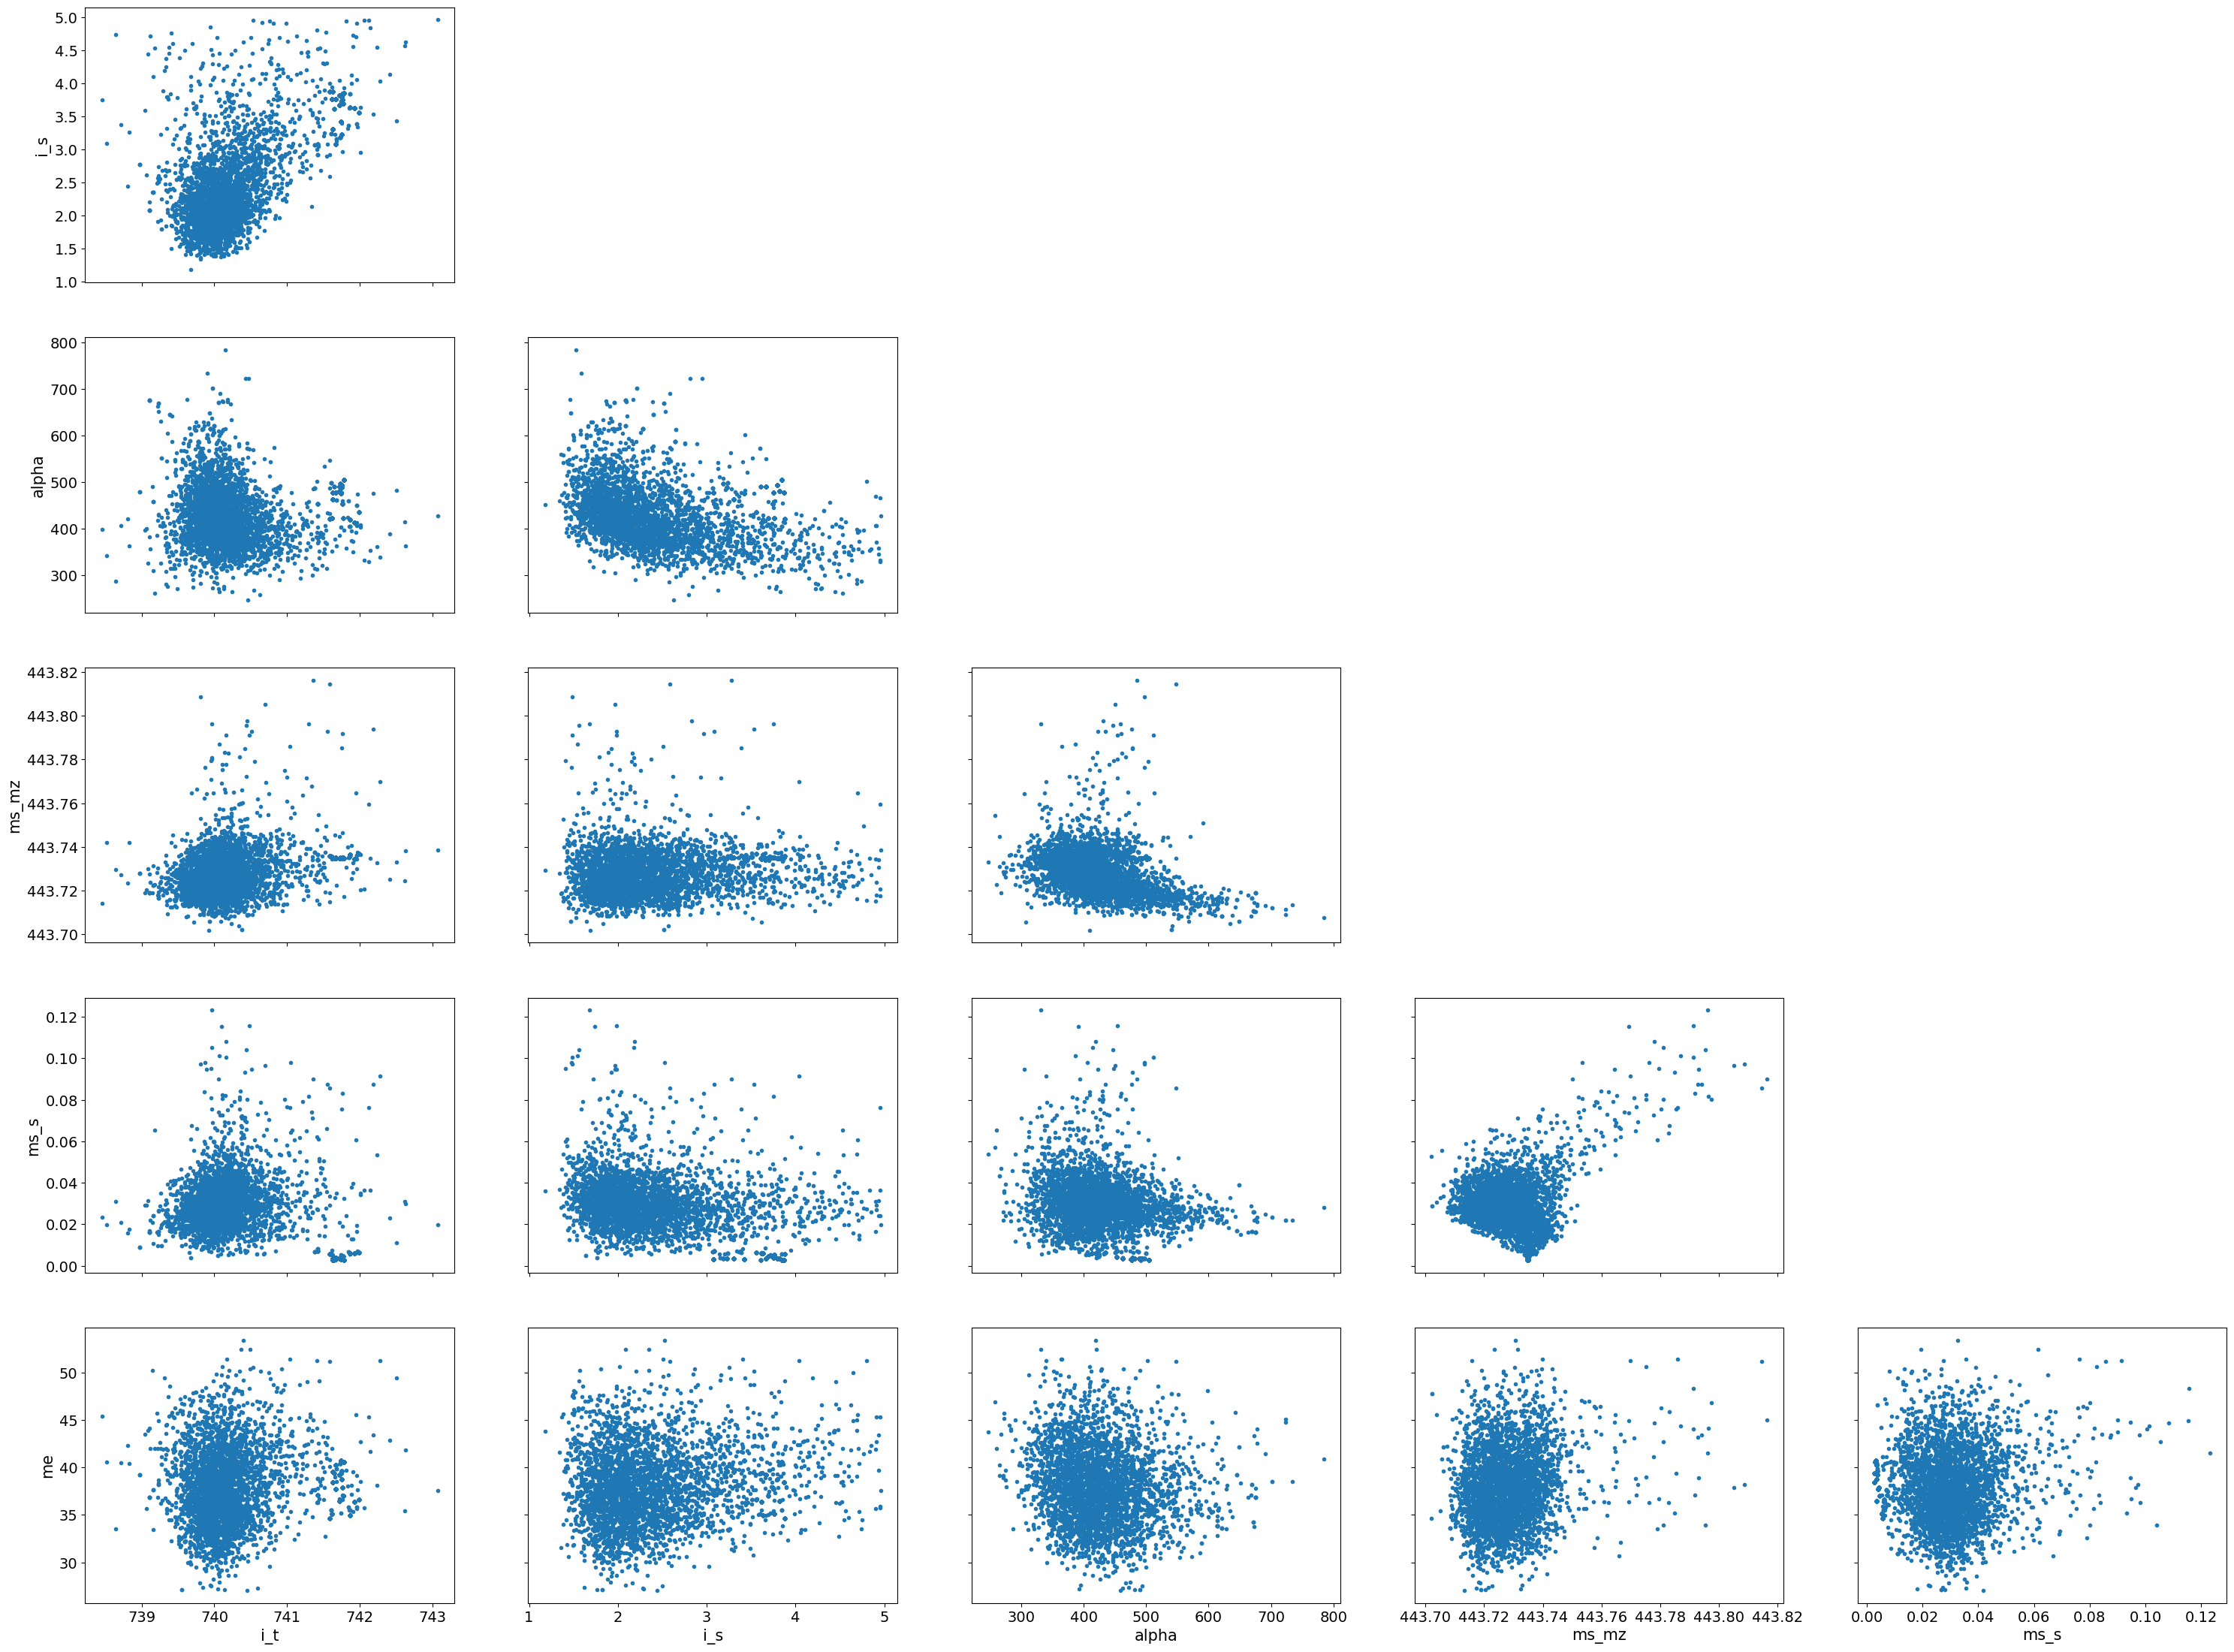

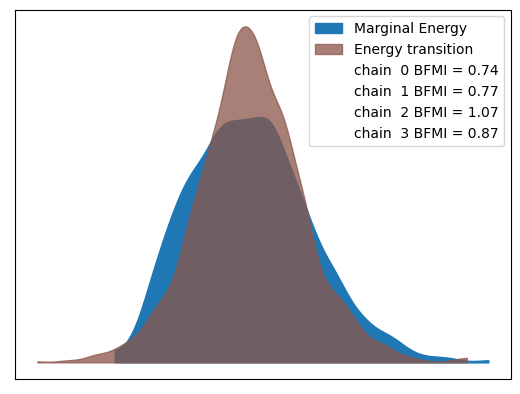

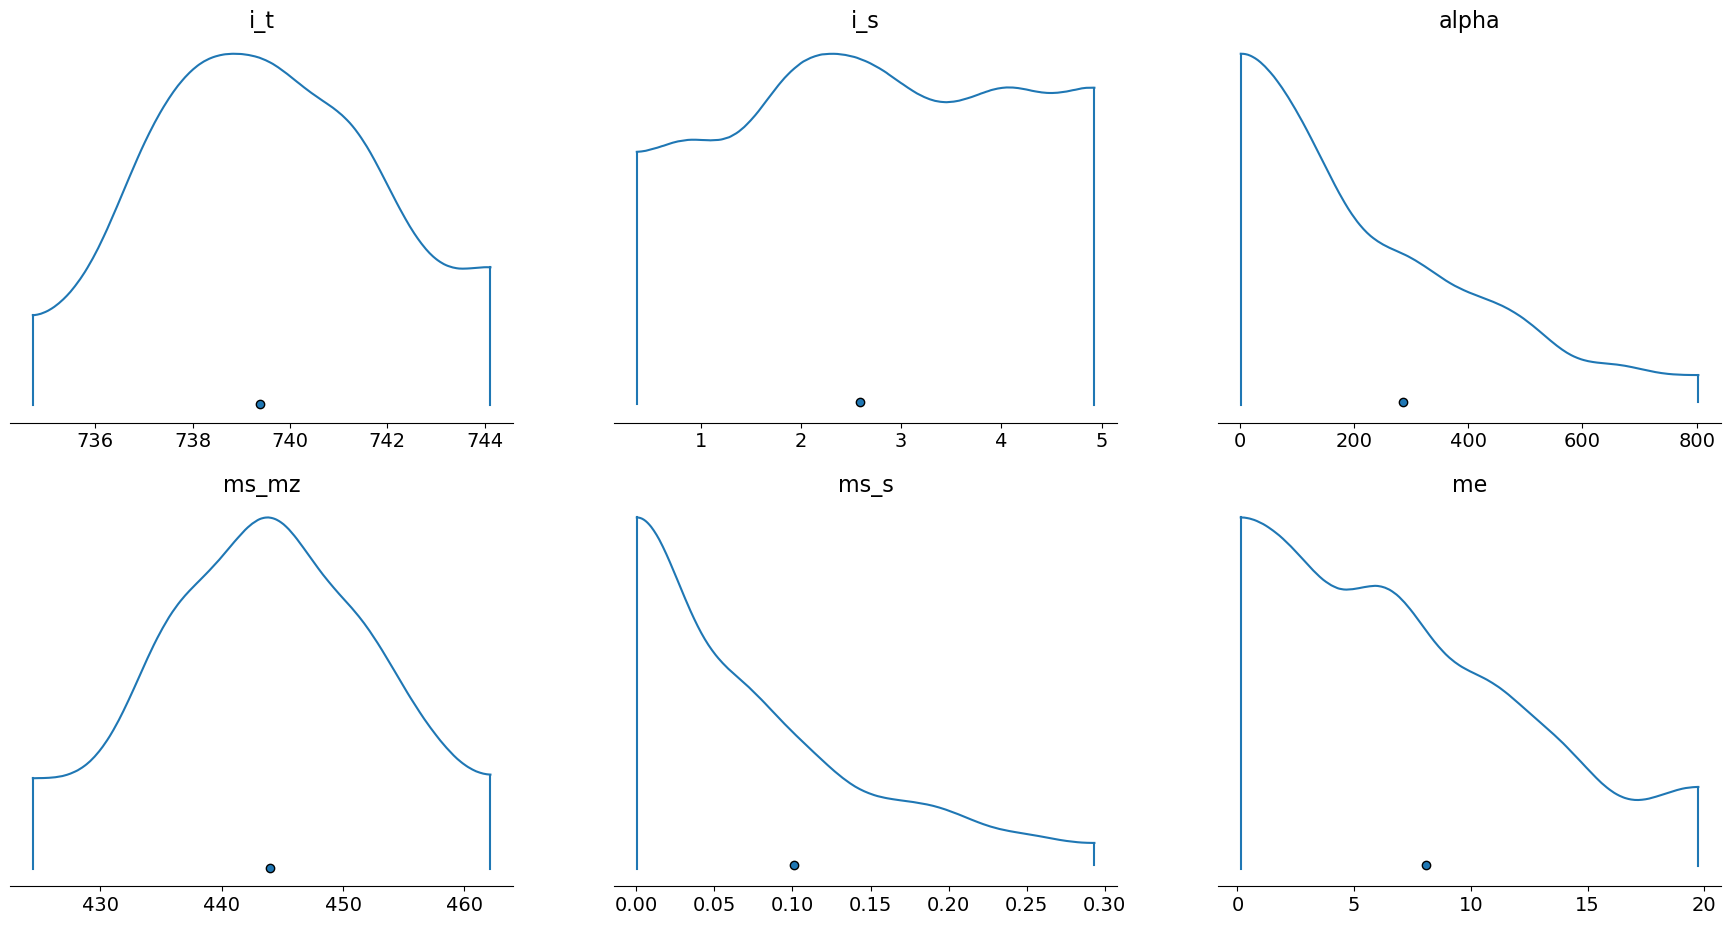

In [18]:
model.arviz_plots(save_fig=False)